In [ ]:
# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
# Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

# Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.

# Crosstab Analysis:

# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?

# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.
# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

# Violin Plots:

# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?
# Visualizations:

# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
# Use a correlation heatmap to visualize correlations between all numerical variables.
# Examine if product prices typically follow a normal distribution using a QQ plot.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 300)

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/air/ironHack/Course/pandas/labs_week4/amz_uk_price_prediction_dataset.csv')

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
# Filtering out columns in the dataframe where more than 80% of the values are missing
df = df[df.columns[df.isnull().mean() < 0.8]]

In [ ]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.

# Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?

# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.
# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart. 

In [11]:
#Identifies categories with a higher proportion of best-sellers.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

crosstab['BestSeller_Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
crosstab_sorted = crosstab.sort_values(by='BestSeller_Proportion', ascending=False)
print(crosstab_sorted[['BestSeller_Proportion']])

isBestSeller                                      BestSeller_Proportion
category                                                               
Grocery                                                        0.058135
Smart Home Security & Lighting                                 0.057692
Health & Personal Care                                         0.057686
Mobile Phone Accessories                                       0.042471
Power & Hand Tools                                             0.035339
Billiard, Snooker & Pool                                       0.032129
Pet Supplies                                                   0.030200
Home Brewing & Wine Making                                     0.028455
Wind Instruments                                               0.028000
Mirrors                                                        0.028000
Professional Medical Supplies                                  0.027344
PC & Video Games                                               0

In [13]:
from scipy.stats import chi2_contingency

In [15]:
# Tests if there's a statistically significant relationship between category and best-seller status.
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))
print(f"Chi-square Statistic: {chi2}, p-value: {p}")

Chi-square Statistic: 36540.20270061387, p-value: 0.0


In [17]:
# Measures the strength of the relationship.
n = df.shape[0]  # total number of samples
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.08646709890892415


In [19]:
top_categories = crosstab_sorted.nlargest(30, 'BestSeller_Proportion')

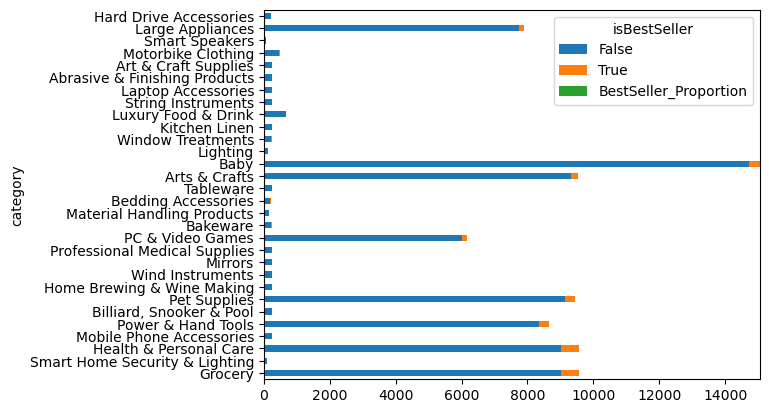

In [21]:
top_categories.plot(kind="barh", stacked=True)
      
plt.show()

In [ ]:
# Categories with a high proportion of bestselling products indicate areas with 
# potentially higher consumer interest or market demand. Categories like Baby or Kitchen Linen 
# might have a high proportion of bestsellers despite potentially fewer total products.
# Categories with mostly blue bars and very small orange segments indicate 
# niches with limited bestselling representation. 

In [ ]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

# Violin Plots:

# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [23]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [25]:
data_series = df['price']  
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [67]:
Q1 = data_series.quantile(0.25)
Q3 = data_series.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(df_no_outliers)

             uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Clothing, Cycling ...    0.0    

In [71]:
top_categories = df['category'].value_counts().head(20).index

# Filter only the top 20 categories
df_top_categories = df[df['category'].isin(top_categories)]

In [73]:
price_threshold = df_top_categories['price'].quantile(0.95)
filtered_data = df_top_categories[df_top_categories['price'] <= price_threshold]

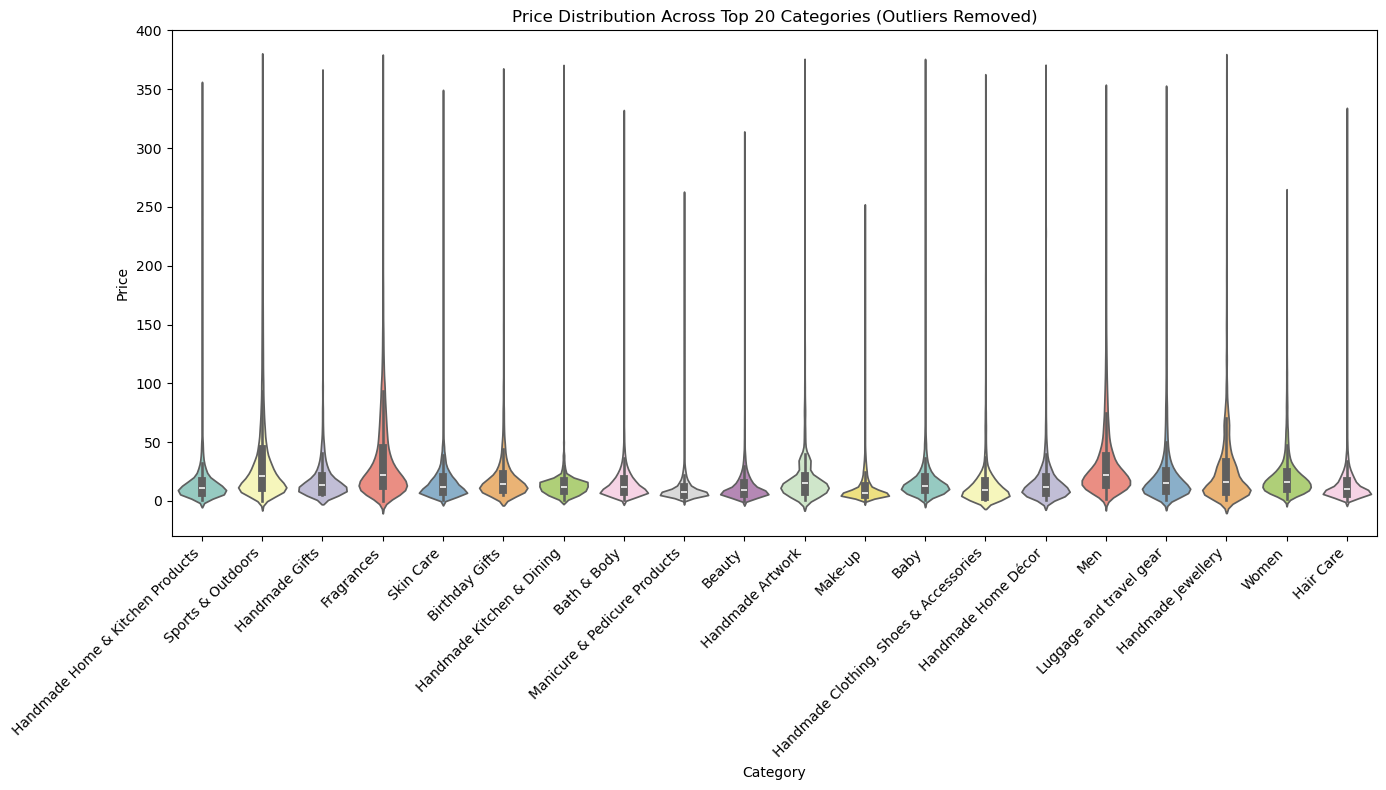

In [75]:
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=filtered_data,
    x='category',
    y='price',
    hue='category',
    inner="box",
    palette="Set3"
)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Price Distribution Across Top 20 Categories (Outliers Removed)")
plt.xlabel("Category")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [87]:
median_prices = df.groupby('category')['price'].median().sort_values(ascending=False)

highest_median_category = median_prices.idxmax()
highest_median_price = round(median_prices.max(), 2)

print(f"The product category with the highest median price is '{highest_median_category}', with {highest_median_price}.")

The product category with the highest median price is 'Laptops', with 1042.72.


In [89]:
avg_price_by_category = df.groupby('category')['price'].mean().sort_values(ascending=False)

In [99]:
top_30_categories = avg_price_by_category.head(30)
# Filter the original dataframe to include only the top 30 categories
df_top_30 = df[df['category'].isin(top_30_categories.index)]

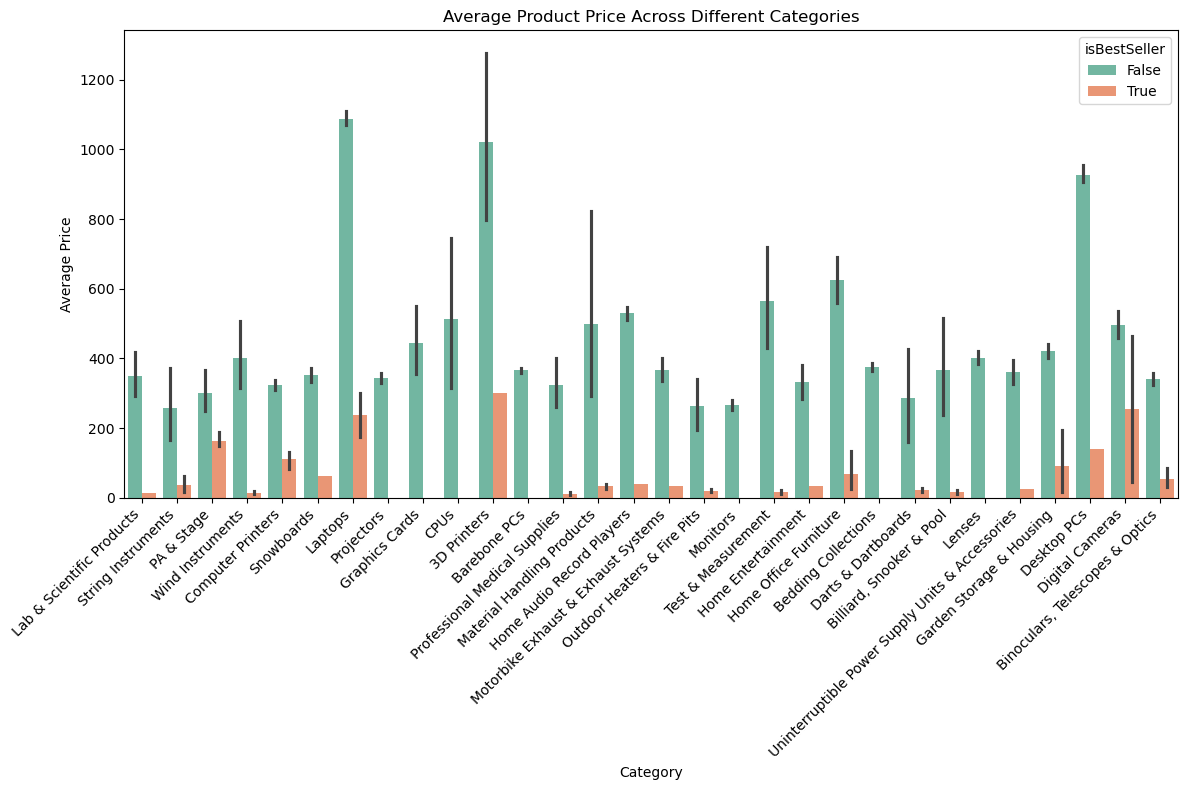

In [103]:
plt.figure(figsize=(12, 8))
sns.barplot(x='category', 
            y='price', 
            data=df_top_30, 
            hue='isBestSeller', 
            estimator='mean', 
            palette="Set2"
           )

plt.xticks(rotation=45, ha='right')
plt.title("Average Product Price Across Different Categories")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

In [105]:
# Identify the category with the highest average price
highest_avg_price_category = avg_price_by_category.idxmax()
highest_avg_price_value = round(avg_price_by_category.max(), 2)

print(f"The category with the highest average price is '{highest_avg_price_category}' with an average price of {highest_avg_price_value}")

The category with the highest average price is 'Laptops' with an average price of 1087.99


In [107]:
category_counts = df['category'].value_counts()
top_10_categories = category_counts.head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

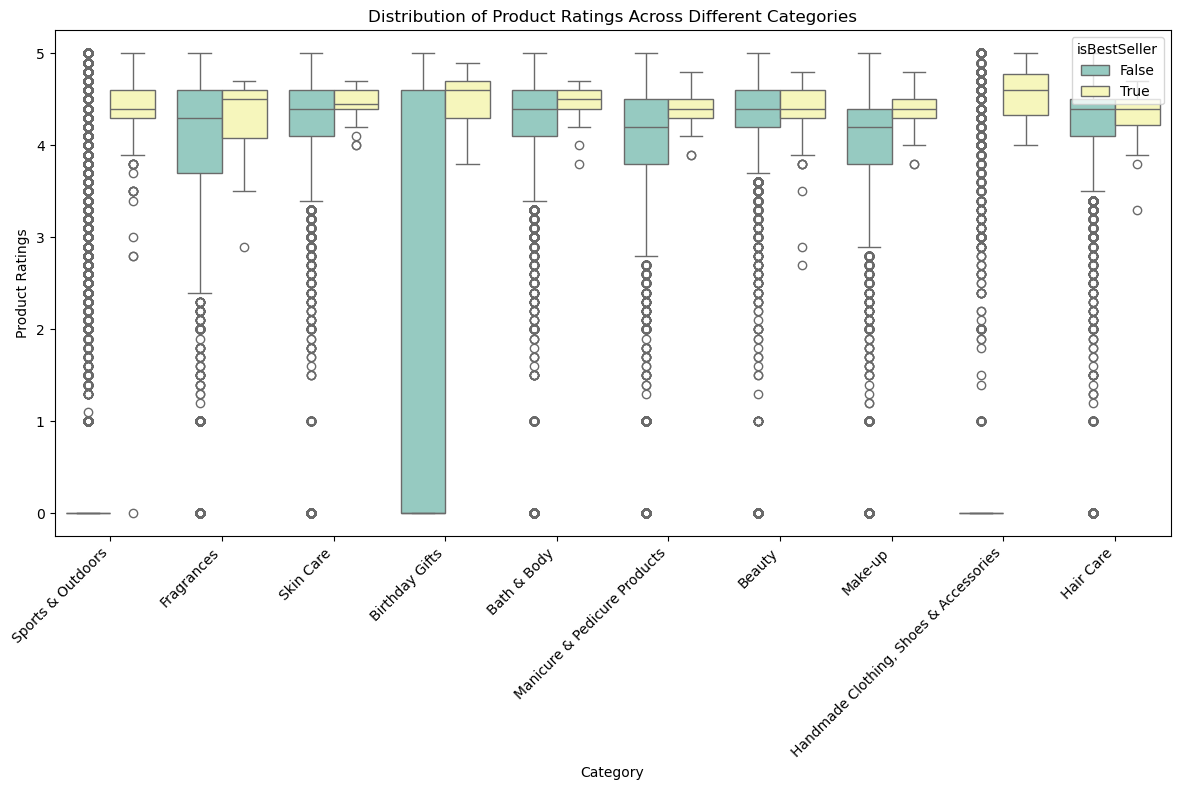

In [109]:
plt.figure(figsize=(12, 8))  
sns.boxplot(x='category', y='stars', data=df_top_10, hue='isBestSeller', palette="Set3")

plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Product Ratings Across Different Categories")
plt.xlabel("Category")
plt.ylabel("Product Ratings")
plt.tight_layout()
plt.show()

In [111]:
median_ratings_by_category = df_top_10.groupby('category')['stars'].median()
highest_median_rating_category = median_ratings_by_category.idxmax()
highest_median_rating_value = round(median_ratings_by_category.max(), 2)

print(f"The category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating_value}")

The category with the highest median rating is 'Bath & Body' with a median rating of 4.4
